# Plotting with Matplotlib

In this lecture, we study how to plot numerical data. Python itself does not have any built-in
plotting capabilities, so we will be using [`matplotlib`](https://matplotlib.org/),
the most popular graphics library for Python.

-   For details on a particular plotting function, see the
    [official documentation](https://matplotlib.org/stable/users/index.html).
-   There is an official introductory [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
    which you can use along-side the material presented here.

In order to access the functions and objects from matplotlib, we
first need to import them. The general convention is to use the
namespace `plt` for this purpose:

```python
import matplotlib.pyplot as plt
```

Note that there is an additional high-level plotting library called 
[seaborn](https://seaborn.pydata.org/) which builds on top of Matplotlib with a focus on providing 
convenient functions to create statistical graphs.

***
## Line plots

One of the simplest plots we can generate using the
[`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
function is a line defined by a list of $y$-values.

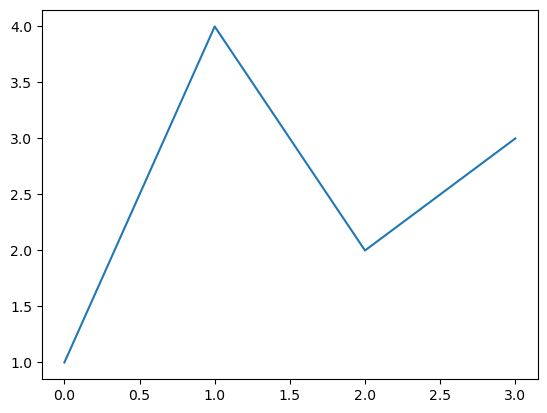

In [29]:
# import matplotlib library
import matplotlib.pyplot as plt

# Plot list of integers
yvalues = [1, 4, 2, 3]
plt.plot(yvalues)

We didn't even have to specify the corresponding $x$-values,
as Matplotlib automatically assumes them to be [0, 1, 2, ...].
Usually, we want to plot for a given set of $x$-values like this:

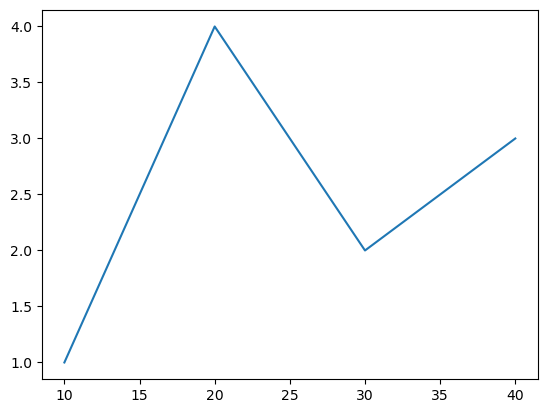

In [30]:
# explicitly specify x-values
xvalues = [10, 20, 30, 40]
plt.plot(xvalues, yvalues)

<div class="alert alert-info">
<h3> Your turn</h3>

Plot the quadratic function <i>y = x<sup>2</sup></i> on the interval [-1, 1]:
<ol>
    <li>Create a grid of 50 <i>x</i>-values using <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><tt>np.linspace()</tt></a>.</li>
    <li>Compute the corresponding <i>y</i>-values and plot them.</li>
</ol>
</div>

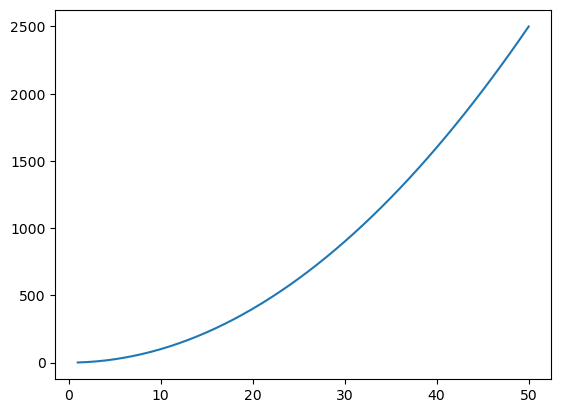

In [36]:
import numpy as np

xvaluesnig = np.linspace(1,50)
yvaluesnig = xvaluesnig ** 2

plt.plot(xvaluesnig, yvaluesnig)

### Plotting multiple lines

We can also specify multiple lines to be plotted in a single graph:

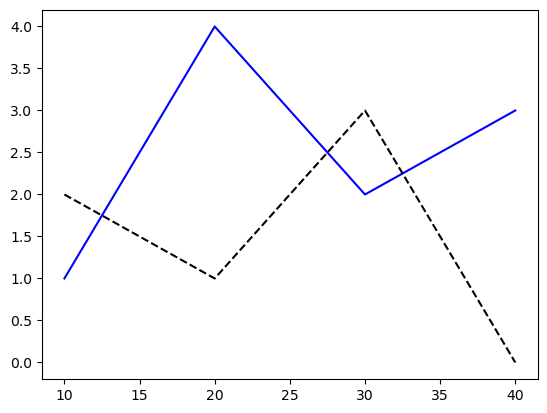

In [37]:
yvalues2 = [2.0, 1.0, 3.0, 0.0]
plt.plot(xvalues, yvalues, 'b-', xvalues, yvalues2, 'k--')

### Specifying plot styles

The characters following each set of $y$-values are style specifications.
The letters are short-hand notations for colors
(see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

The remaining characters set the line styles. Valid values are

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

Additionally, we can append marker symbols to the style specification.
The most frequently used ones are

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

The whole list of supported symbols can be found [here](https://matplotlib.org/stable/api/markers_api.html).

Instead of passing multiple values to be plotted at once, 
we can also repeatedly call `plot()` to add additional elements to a graph. 
This is more flexible since we can pass additional arguments which are 
specific to one particular set of data, such as labels displayed in legends.

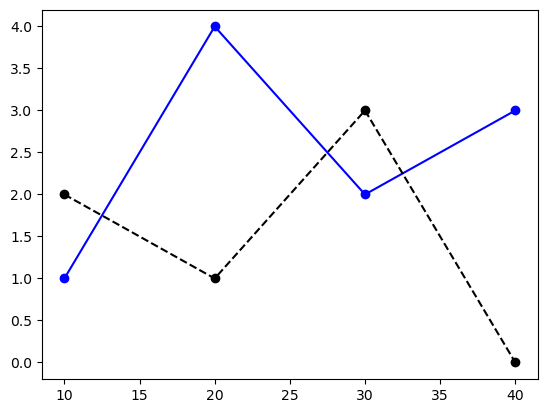

In [39]:
# Plot two lines by calling plot() twice
plt.plot(xvalues, yvalues, 'b-o', xvalues, yvalues2, 'k--o')
#plt.plot(xvalues, yvalues2, 'k--o')

Individual calls to `plot()` also allow us to specify styles
more explicitly using keyword arguments:

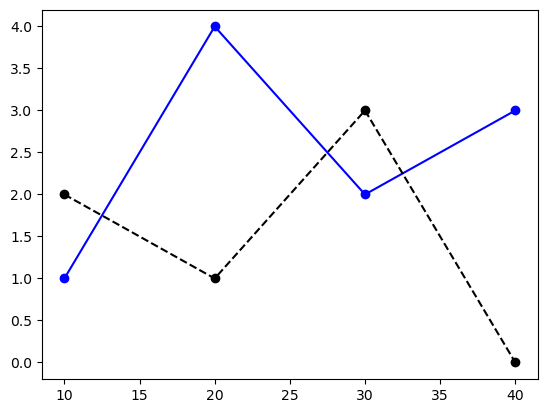

In [40]:
# pass plot styles as explicit keyword arguments
plt.plot(xvalues, yvalues, color='blue', linestyle='-', marker='o')
plt.plot(xvalues, yvalues2, color='black', linestyle='--', marker='o')

Note that in the example above, we use named colors such as `'red'` or `'blue'` (see 
[here](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors) for the complete list of named colors). 

Matplotlib accepts abbreviations for the most common 
style definitions using the following shortcuts:

- `c` or `color`
- `ls` or `linestyle`
- `lw` or `linewidth`
- `ms` or `markersize`

See the section on _Other Parameters_ in the [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
documentation for a complete list of arguments and their abbreviations.

We can thus rewrite the above code as follows:

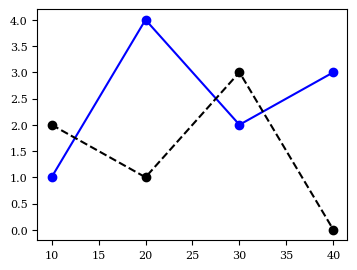

In [ ]:
# abbreviate plot style keywords
plt.plot(xvalues, yvalues, c='blue', ls='-', marker='o')
plt.plot(xvalues, yvalues2, c='black', ls='--', marker='o')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data from <TT>FRED_annual.csv</TT>. The file contains annual observations
        on selected macroeconomic variables for the US.
    </li>
    <li>Plot the unemployment rate (column <TT>UNRATE</TT>) using a blue dashed line with line width 0.5 and the inflation rate (column <TT>INFLATION</TT>) using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

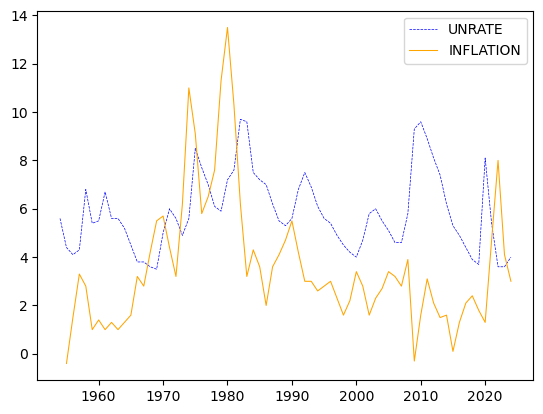

In [54]:
import pandas as pd

data_path = '../../data/FRED/FRED_annual.csv'
df = pd.read_csv(data_path)

ys1 = df['UNRATE'].tolist()
ys2 = df['INFLATION'].tolist()
xs = df['Year'].tolist()

plt.plot(xs, ys1, c='blue',ls='--',lw='0.5', label='UNRATE')
plt.plot(xs, ys2, c='orange',ls='-',lw='0.75', label = 'INFLATION')
plt.legend()

***
## Scatter plots

We use the [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 
function to create scatter plots in a similar fashion to line plots. 

To illustrate, we first generate some random data using the NumPy Random Number Generator (RNG) interface. We won't go into detail how to generate random numbers with NumPy, so you can just take that code as give.

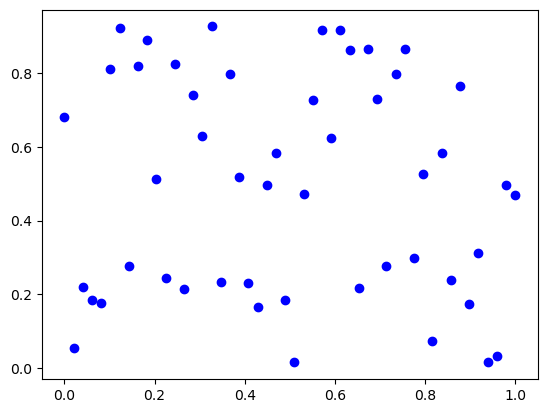

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Number of points
N = 50

# Create 50 uniformly-spaced values on the unit interval
xvalues = np.linspace(0.0, 1.0, N)
# Draw random numbers from interval [0, 1)
yvalues = np.random.default_rng(seed=123).random(N)

plt.scatter(xvalues, yvalues, color='blue')

We could in principle create scatter plots using `plot()` by turning
off the connecting lines. However, `scatter()` allows
us to specify the color and marker size as collections, so
we can vary these for every point. `plot()`, on the other hand, imposes
the same style on all points plotted in that particular function call.

To illustrate, the following code assigns a different (randomly drawn) marker size 
to each dot:

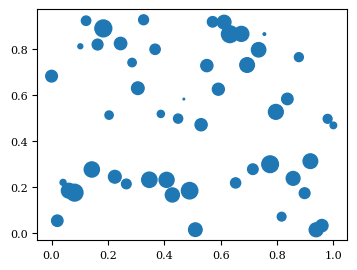

In [ ]:
# Draw random marker sizes
size = np.random.default_rng(seed=456).random(N) * 150.0

# plot with point-specific marker sizes
plt.scatter(xvalues, yvalues, s=size)

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>FRED_monthly.csv</TT>. The file contains monthly observations
        on selected macroeconomic variables for the US.
    </li>
    <li>Create a scatter plot of the real interest rate (column <TT>REALRATE</TT>) on the y-axis against the Federal Funds rate (column <TT>FEDFUNDS</TT>) on the x-axis.
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    </li>
</ol>
</div>

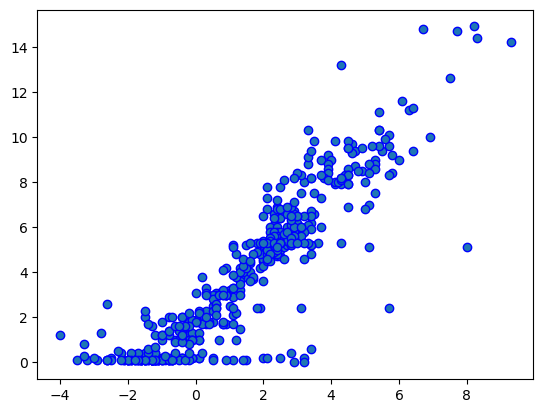

In [55]:
data_path2 = '../../data/FRED/FRED_monthly.csv'
df = pd.read_csv(data_path2)

xs = df['REALRATE'].tolist()
ys = df['FEDFUNDS'].tolist()

plt.scatter(xs, ys, edgecolors='blue')

***

## Histograms

We use the [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to create histograms which can be used to nonparametrically visualize the distribution of some sample data.

To illustrate, we draw a random sample from the standard-normal distribution and visualize it using a histogram:

Text(0.5, 1.0, 'Histogram of normal draws')

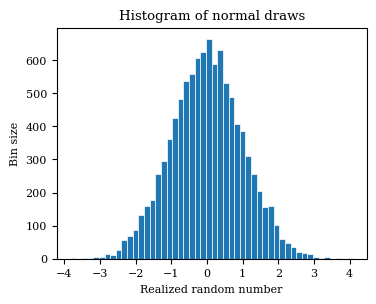

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Draw 10,000 standard-normal numbers
x = np.random.default_rng(seed=1234).normal(size=10_000)

# Plot the results as a histogram
plt.hist(x, bins=50, linewidth=0.5, edgecolor='white')
plt.xlabel('Realized random number')
plt.ylabel('Bin size')
plt.title('Histogram of normal draws')

***
## Plotting categorical data

Instead of continuous numerical values on the $x$-axis, we can also plot categorical
variables as bar charts using the function [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

To illustrate, the following example creates a bar chart showing the population numbers of the four largest municipalities in Norway:

Text(0, 0.5, 'In thousand')

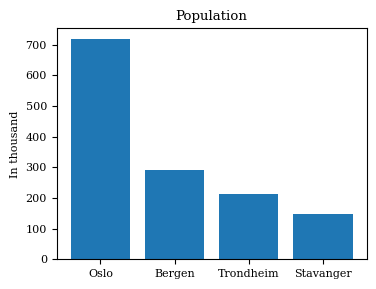

In [ ]:
import matplotlib.pyplot as plt

# Define category labels
municipality = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
# Population in thousand
population = np.array([717710, 291940,  214565, 149048]) / 1000

# Create bar chart
plt.bar(municipality, population)

# Add overall title
plt.title('Population')
plt.ylabel('In thousand')

We use [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) to create *horizontal* bars:

Text(0.5, 0, 'In thousand')

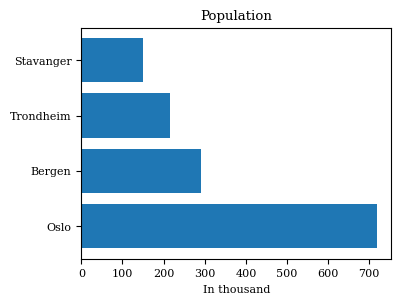

In [ ]:
plt.barh(municipality, population)
plt.title('Population')
plt.xlabel('In thousand')

***
## Adding labels and annotations

Matplotlib has numerous functions to add labels and annotations:

-   Use [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) 
    and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) 
    to add titles.
    The latter adds a title for the whole figure, which might
    span multiple plots (called "axes" in Matplotlib).
-   We can add axis labels by calling 
    [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
    and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).
-   To add a legend, call 
    [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), which in its most simple
    form takes a list of labels which are in the same order
    as the plotted data.
-   Use [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)
    to add additional text at arbitrary locations.

*Example: Add title, labels, and a legend to some demo data*

Text(0.05, 0.05, 'More text')

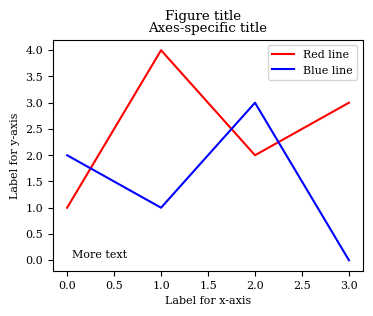

In [ ]:
import matplotlib.pyplot as plt

# Demo data used for plotting
xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, color='red')
plt.plot(xvalues, yvalues2, color='blue')

# Add titles, labels, legend, and text
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])
# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

***
## Plot limits, ticks and tick labels

We adjust the plot limits, ticks and tick labels as follows:

-   Plotting limits are set using the 
    [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and 
    [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) functions.
    Each accepts a tuple `(min,max)` to set the desired range.
-   Ticks and tick labels can be set by calling 
    [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) 
    or [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html).

*Example: Adding horizontal and vertical lines*

We demonstrate the use of these functions by plotting the sine function on the interval $[0, 2\pi]$:

(-1.1, 1.1)

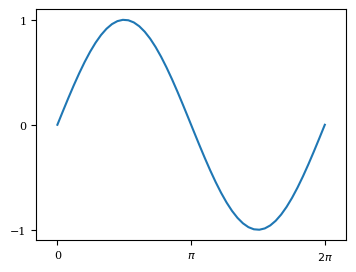

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data using the sine function
xvalues = np.linspace(0.0, 2*np.pi, 50)
yvalues = np.sin(xvalues)

plt.plot(xvalues, yvalues)

# Set major ticks and labels for x-axis
#   1. Define tick positions
xticks = [0.0, np.pi, 2*np.pi]
#   2. Define tick labels (can use LaTeX code!)
xtick_labels = ['0', r'$\pi$', r'$2\pi$']
plt.xticks(xticks, xtick_labels)

# Set major ticks for y-axis
plt.yticks([-1.0, 0.0, 1.0])

# Adjust plot limits in x and y direction
plt.xlim((-0.5, 2*np.pi + 0.5))
plt.ylim((-1.1, 1.1))


***

## Adding straight lines

Quite often, we want to add horizontal or vertical lines to highlight a particular value. We can do this using the following functions:

- [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) adds a *horizontal* line at a given $y$-value.
- [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) adds a *vertical* line at a given $x$-value.
- [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline) adds a line defined by two points or by a single point and a slope.

*Example: Adding horizontal and vertical lines*

Consider the sine function from above. We can add a horizontal line at 0 and two vertical lines at the points where the function attains its minimum and maximum as follows:

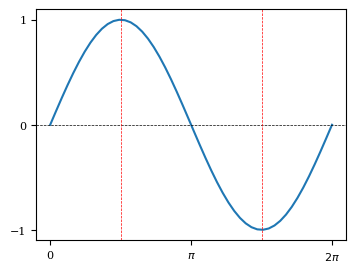

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot sine function (same as above)
xvalues = np.linspace(0.0, 2*np.pi, 50)
yvalues = np.sin(xvalues)

plt.plot(xvalues, yvalues)

# Set major ticks and labels for x-axis
#   1. Define tick positions
xticks = [0.0, np.pi, 2*np.pi]
#   2. Define tick labels (can use LaTeX code!)
xtick_labels = ['0', r'$\pi$', r'$2\pi$']
plt.xticks(xticks, xtick_labels)

# Set major ticks for y-axis
plt.yticks([-1.0, 0.0, 1.0])

# Add black dashed horizontal line at y-value 0
plt.axhline(0.0, lw=0.5, ls='--', c='black')

# Add red dashed vertical lines at maximum / minimum points
plt.axvline(0.5*np.pi, lw=0.5, ls='--', c='red')
plt.axvline(1.5*np.pi, lw=0.5, ls='--', c='red')

<div class="alert alert-info">
<h3> Your turn</h3>
Plot the function <i>y=(x-1)<sup>2</sup></i> on the interval [0, 2]:
<ol>
    <li>Create a grid of 50 <i>x</i>-values using <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><tt>np.linspace()</tt></a>.</li>
    <li>Compute and plot the <i>y</i>-values.</li>
    <li>Label the <i>x</i>- and <i>y</i>-axes with <i>"x"</i> and <i>"y"</i>.</li>
    <li>Add the title <i>"y = (x-1)^2"</i>.</li>
    <li>Add a vertical line at <i>x=1</i> using a dashed line style.</li>
</ol>

</div>

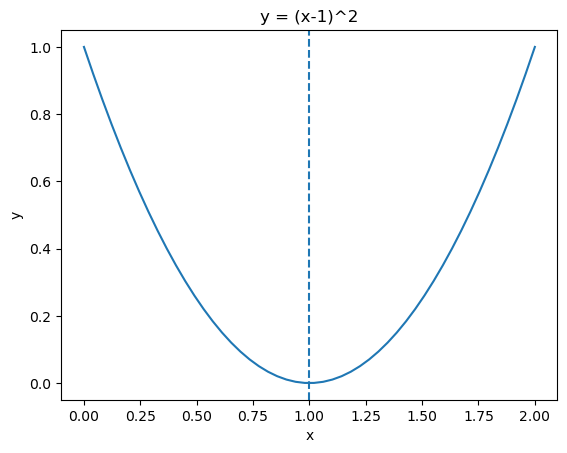

In [73]:
xs = np.linspace(0,2,50)
ys = (xs-1)**2

plt.plot(xs,ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = (x-1)^2')
plt.axvline(x=1, ls='--')



***
## Object-oriented interface

So far, we have only used the so-called `pyplot` interface which involves
calling *global* plotting functions from `matplotlib.pyplot`.
This interface is intended to be similar to Matlab, but is also somewhat
limited and less clean.

We can instead use the object-oriented interface
(called this way because we call methods of the 
[`Figure`](https://matplotlib.org/stable/api/figure_api.html) and 
[`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects).
While there is not much point in using the object-oriented interface
in a Jupyter notebook when we want to create a single graph, it should be the preferred method when
writing re-usable code in Python files or when creating a figure with multiple subplots.

To use the object-oriented interface, we need to get figure and
axes objects. The easiest way to accomplish this is using
the [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function, like this:

```python
fig, ax = plt.subplots()
```

We then use methods of the `Axes` object returned by `subplots()` instead of the 
functions we have used so far. For example, instead of 
[`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), 
we use the [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) 
method.

As an example, we recreate the graph from the section on
labels and annotations using the object-oriented interface:

In [74]:
# Demo data used for plotting
xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

Text(0.05, 0.05, 'More text')

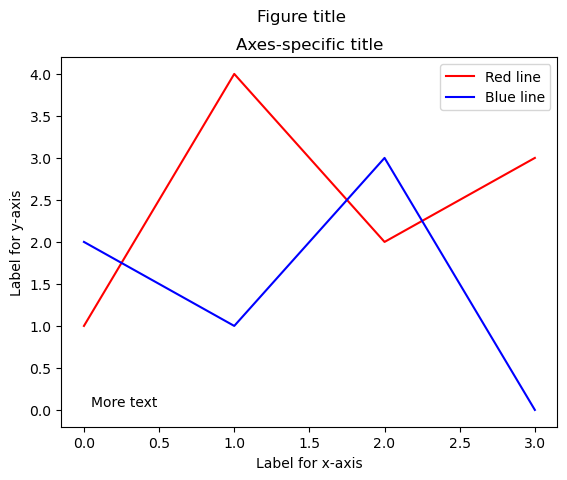

In [75]:
import matplotlib.pyplot as plt

# Create Figure and Axes objects
fig, ax = plt.subplots()

ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')

# Add titles, labels, legend, and text
fig.suptitle('Figure title')                        # Alternative: plt.suptitle()
ax.set_title('Axes-specific title')                 # Alternative: plt.title()
ax.set_xlabel('Label for x-axis')                   # Alternative: plt.xlabel()
ax.set_ylabel('Label for y-axis')                   # Alternative: plt.ylabel()
ax.legend(['Red line', 'Blue line'])                # Alternative: plt.legend()
# Adds text at data coordinates (0.05, 0.05)
ax.text(0.05, 0.05, 'More text')                    # Alternative: plt.text()


The code is quite similar to the previous section, except that most attributes are set using
the `set_xxx()` methods of the `ax` object. For example,
instead of calling `xlim()`, we use 
[`ax.set_xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).

***
## Working with multiple plots (axes)

The object-oriented interface becomes particularly useful
if we want to create multiple axes (or figures). This can also be achieved
using the `pyplot` programming model but is somewhat more obscure.

For example, to create a row with two subplots, we use:

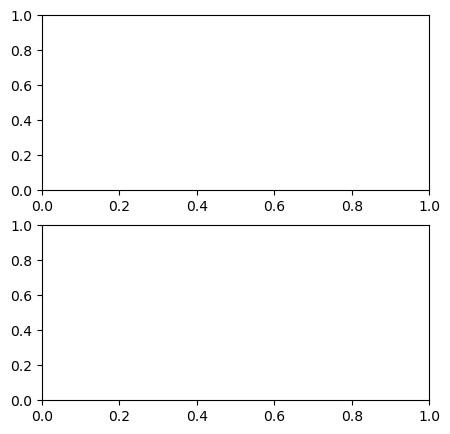

In [78]:
import matplotlib.pyplot as plt

# Create one figure with 2 axes objects, arranged as two columns in a single row
fig, axes = plt.subplots(2, 1, figsize=(5, 5.0))

With multiple axes objects in a single figure (as in the above example), the `axes` returned by 
[`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
is a NumPy array. Its elements
map to the individual panels within the figure in a natural way.

We can visualize this mapping for the case of a single row
and two columns as follows:

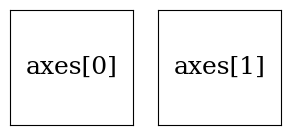

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(3.5,1.5))

for i, ax in enumerate(axes):
    # Turn off ticks of both axes
    ax.set_xticks(())
    ax.set_yticks(())
    # Label axes object
    text = f'axes[{i}]'
    ax.text(0.5, 0.5, text, va='center', ha='center', fontsize=18)

Don't worry about the details of how this graph is generated, the only take-away here is
how axes objects are mapped to the panels in the figure.

If we request panels in two dimensions, the `axes` object will be a 2-dimensional
array, and the mapping of axes objects to panels will look like this instead:

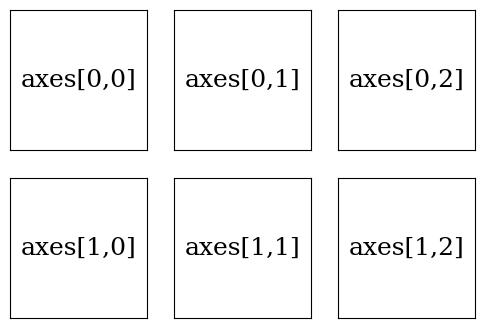

In [ ]:
# Create figure with 2 rows, 3 columns
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(6,4))

for i in range(nrow):
    for j in range(ncol):
        # Get reference to current Axes object
        ax = axes[i, j]
        # Turn off ticks of both axes
        ax.set_xticks(())
        ax.set_yticks(())
        # Label axes object
        text = f'axes[{i},{j}]'
        ax.text(0.5, 0.5, text, va='center', ha='center', fontsize=18)

*Example: Create a plot with 2 panels*

We can use the elements of `axes` to plot into individual panels:

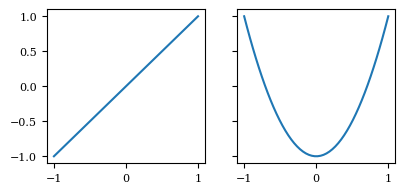

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Request a figure with 2 panels (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(4.5, 2.0))

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot into first column
axes[0].plot(xvalues, xvalues)

# Plot into second column
axes[1].plot(xvalues, 2*xvalues**2.0 - 1)

*Example: Create a figure with 2 rows and 2 columns*

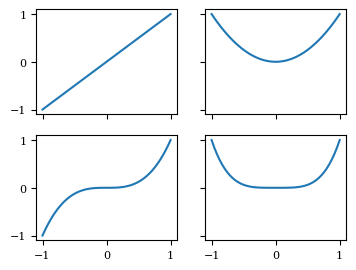

In [ ]:
# create figure with 2 rows, 2 columns
nrow = 2
ncol = 2
fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True)

xvalues = np.linspace(-1.0, 1.0, 50)

# Plot the first four powers of x
exponent = 1
for i in range(nrow):
    for j in range(ncol):
        yvalues = xvalues**exponent
        axes[i,j].plot(xvalues, yvalues)
        # Increment exponent for next subplot
        exponent += 1

Note the use of `sharex=True` and `sharey=True`. This tells
Matplotlib that all axes share the same plot limits, so the
tick labels can be omitted in the figure's interior to
preserve space.

<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: <i>y = sin(x)</i></li>
    <li>Subplot 2: <i>y = sin(2*x)</i></li>
    <li>Subplot 3: <i>y = sin(4*x)</i></li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.
</div>

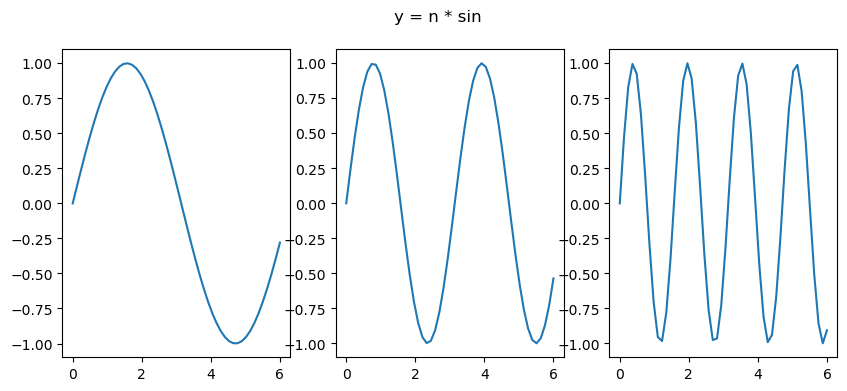

In [138]:
xvalues = np.linspace(0,6,50)
yvalues1 = np.sin(xvalues)
yvalues2 = np.sin(2*xvalues)
yvalues3 = np.sin(4*xvalues)

fig, ax = plt.subplots(1, 3, figsize = (10,4), sharex=True)



fig.suptitle('y = n * sin')
ax[0].plot(xvalues, yvalues1)
ax[1].plot(xvalues, yvalues2)
ax[2].plot(xvalues, yvalues3)


***
# Plotting with pandas

Pandas does not implement its own graphics library, but provides convenient wrappers around Matplotlib functions that can be used to quickly visualize data stored in DataFrames. Alternatively, we can extract the numerical data and pass it to Matplotlib's routines manually.

## Bar charts with pandas

Let's return to our municipality population data.
To plot population numbers as a bar chart, we can directly use pandas's
[`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html):

<Axes: xlabel='Municipality'>

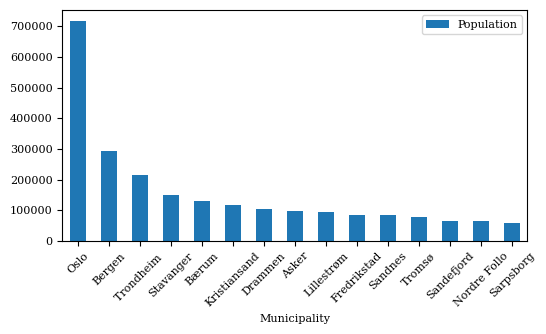

In [ ]:
import pandas as pd 

# Path to local data/ folder
DATA_PATH = '../../data'

# Path to population data
filepath = f'{DATA_PATH}/population_norway.csv'

# Read in population data for Norwegian municipalities
df = pd.read_csv(filepath)

# Keep only the first 15 observations
df = df.iloc[:15]

# Create bar chart, specify figure size, rotate x-axis tick labels by 45 degrees
df.plot.bar(x='Municipality', y='Population', rot=45, figsize=(6,3))

Alternatively, we can construct the graph ourselves using Matplotlib:

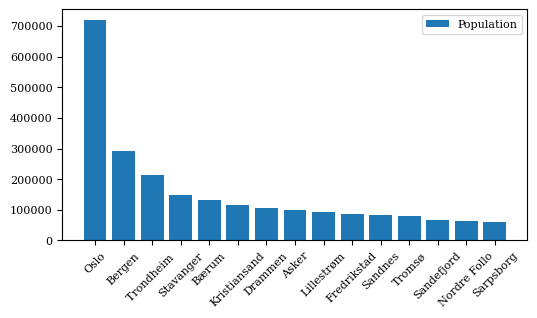

In [ ]:
import matplotlib.pyplot as plt

# Extract municipality names
labels = df['Municipality']

# Extract population numbers
values = df['Population']

# Create new figure with desired size
plt.figure(figsize=(6, 3))

# Create bar chart
plt.bar(labels, values)

# Add legend
plt.legend(['Population'])

# Rotate tick labels by 45 degrees
plt.tick_params(axis='x', labelrotation=45)

Matplotlib's functions usually directly work with pandas's data structures.
In cases where they don't, we can convert a `DataFrame` or `Series` object
to a NumPy array using the 
[`to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) 
method.

***
## Plotting time series data

To plot time series data, we can use the 
[`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 
method which optionally accepts arguments to specify which columns
should be used for the $x$-axis and which for the $y$-axis. We illustrate
this using the US unemployment rate at annual frequency.

<Axes: xlabel='Year', ylabel='Unemployment rate (%)'>

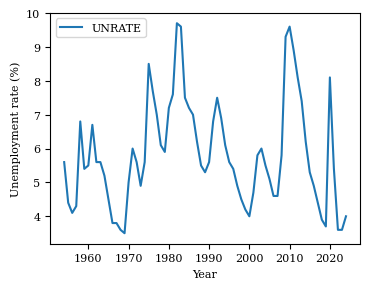

In [ ]:
import pandas as pd

# Path to FRED data; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

# Plot unemployment rate by year
df.plot(x='Year', y='UNRATE', ylabel='Unemployment rate (%)')

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED_monthly_all.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

Text(0.5, 1.0, 'UNRATE')

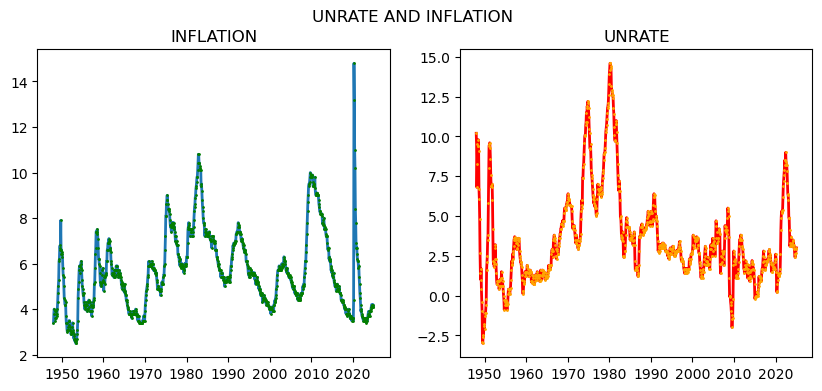

In [148]:
df = pd.read_csv('../../data/FRED/FRED_monthly_all.csv', parse_dates=['DATE'])

xvals = df['DATE']
yvals1 = df['UNRATE']
yvals2 = df['INFLATION']

fig, ax = plt.subplots(1,2, sharex=True, figsize=(10, 4.0))
fig.suptitle('UNRATE AND INFLATION')
ax[0].plot(xvals, yvals1, marker='o', lw = 2, ms = 1, mfc='red', mec = 'green')
ax[0].set_title('INFLATION')

ax[1].plot(xvals, yvals2, marker='o', lw = 2, color='red', ms = 1, mfc='orange', mec = 'orange')
ax[1].set_title('UNRATE')

***
## Scatter plots with pandas

Using the [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method, 
we can generate scatter plots, plotting one column
against another. To illustrate, we plot the US unemployment rate against
inflation in any given year over the post-war period.

Note that you can pass additional arguments (for example `edgecolors`) to pandas's version of `scatter()` which are passed on to Matplotlib's 
[`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html).

<Axes: xlabel='Unemployment rate (%)', ylabel='Inflation (%)'>

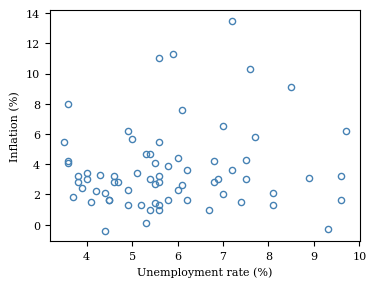

In [ ]:
# Path to FRED.csv; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

df.plot.scatter(
    x='UNRATE',                     # plot unemployment rate on x-axis
    y='INFLATION',                  # plot inflation rate on y-axis
    color='none', 
    edgecolors='steelblue',
    xlabel='Unemployment rate (%)',
    ylabel='Inflation (%)'
)

Pandas also offers the convenience function 
[`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)
which lets us easily create pairwise scatter plots for more than two variables:

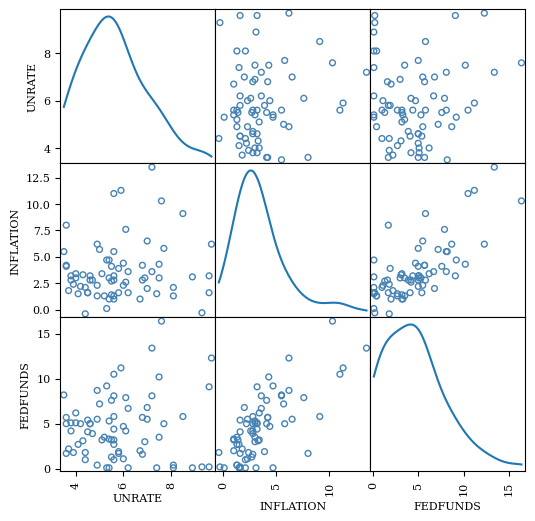

In [ ]:
from pandas.plotting import scatter_matrix

# Columns to include in plot
columns = ['UNRATE', 'INFLATION', 'FEDFUNDS']

# Use argument diagonal='kde' to plot kernel density estimate
# in diagonal panels
ax = scatter_matrix(
    df[columns], 
    figsize=(6, 6),
    diagonal='kde',             # plot kernel density along diagonal
    s=70,                       # marker size
    color='none', 
    edgecolors='steelblue', 
    alpha=1.0, 
)


***
## Box plots with pandas

To quickly plot some descriptive statistics, we can use the 
[`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
provided by pandas. This plot shows the median, the interquartile range (25th to 75th percentile)
and the outliers of some underlying data.

We demonstrate this by plotting the distribution
of the unemployment rate, inflation and the Federal Funds Rate in the US:

<Axes: ylabel='Relative change in % (annual)'>

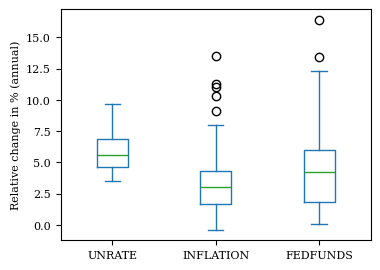

In [ ]:
import pandas as pd

# Path to FRED data; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

# Include only the following columns in plot
columns = ['UNRATE', 'INFLATION', 'FEDFUNDS']

# Create box plot. Alternatively, use df.plot(kind='box')
df[columns].plot.box(ylabel='Relative change in % (annual)')

***
# List of functions used in this lecture

The following list contains the central functions covered in this lecture. Each function name is linked to the official API documentation which you can consult for more details regarding function arguments and return values. The [[go to section]]() links to the relevant section in this notebook.

## Plotting functions

-   [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) — 
    plot data using lines [[go to section]](#line-plots)
-   [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) — 
    create scatter plots [[go to section]](#scatter-plots)
-   [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) —
    create histograms [[go to section]](#histograms)
-   [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) —
    create (vertical) bar charts [[go to section]](#plotting-categorical-data)
-   [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) —
    create *horizontal* bar charts [[go to section]](#plotting-categorical-data)
- [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) — 
    adds a *horizontal* line at a given $y$-value [[go to section]](#adding-straight-lines)
- [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) —
    adds a *vertical* line at a given $x$-value [[go to section]](#adding-straight-lines)

## Plotting with pandas


-   [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) —
    create a line plot (the default) from DataFrame contents [[go to section]](#plotting-time-series-data)
-   [`Dataframe.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) —
    create a bar chart from DataFrame contents [[go to section]](#bar-charts-with-pandas)
-   [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) —
    create a scatter plot from DataFrame contents [[go to section]](#scatter-plots-with-pandas)
-   [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) —
    create a $n$-by-$n$ matrix of scatter plots from DataFrame contents [[go to section]](#scatter-plots-with-pandas)
-   [`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html) —
    create a box plot from DataFrame contents [[go to section]](#box-plots-with-pandas)


## Figures with multiple plots

-   [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) —
    create figure and (one or multiple) axes objects [[go to section]](#working-with-multiple-plots-axes)

## Annotations (labels, legends, ...)


-   [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) —
    add a title for a single sub-figure [[go to section]](#adding-labels-and-annotations)
-   [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) —
    add a title for the whole figure [[go to section]](#adding-labels-and-annotations)
-   [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) —
    add a label for the $x$-axis [[go to section]](#adding-labels-and-annotations)
-   [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) —
    add a label for the $y$-axis [[go to section]](#adding-labels-and-annotations)
-   [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) —
    add a legend [[go to section]](#adding-labels-and-annotations)
-   [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) —
    add arbitrary text at some location [[go to section]](#adding-labels-and-annotations)
-   [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) —
    specify ticks and tick labels for the $x$-axis [[go to section]](#plot-limits-ticks-and-tick-labels)
-   [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) —
    specify ticks and tick labels for the $y$-axis [[go to section]](#plot-limits-ticks-and-tick-labels)


## Other customizations

-   [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) —
    specify plotting limits (lower and upper bounds) for the $x$-axis [[go to section]](#plot-limits-ticks-and-tick-labels)
-   [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) —
    specify plotting limits (lower and upper bounds) for the $y$-axis [[go to section]](#plot-limits-ticks-and-tick-labels)